# Titanic - Machine Learning from Disaster

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Load the dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
pd.set_option('display.max_columns', len(train.columns))
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S


In [3]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Check duplicated values

In [4]:
train[train.duplicated()].sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            0.0
SibSp            0
Parch            0
Ticket           0
Fare           0.0
Cabin            0
Embarked         0
dtype: object

## Exploratory data analysis

In [5]:
# Perform groupby operation and aggregate using a dictionary of aggregation functions
result = train.groupby('Pclass').agg({'Survived': ['sum', 'count']})

# Rename the columns for clarity
result.columns = ['Survived', 'Total']

# Calculate the percentage of survived passengers
result['Percentage'] = (result['Survived'] / result['Total']) * 100
result.reset_index()

,Pclass,Survived,Total,Percentage
0,1,136,216,62.962963
1,2,87,184,47.282609
2,3,119,491,24.236253


### Pclass Summary

In [6]:
# Create a pivot table
pivot_table = pd.pivot_table(train, index=["Pclass"], values=["Survived"],  aggfunc=sum)

# Calculate total passengers for each class using value counts
total_passengers = train['Pclass'].value_counts().sort_index()

# Assign the total passengers to the pivot table
pivot_table['Total'] = total_passengers

#Total Passangers
total_passengers =train['Pclass'].value_counts().sum()

# # Calculate percentage of survived passengers within each class
pivot_table['%CLass'] = (pivot_table["Survived"] / pivot_table['Total']) * 100
pivot_table['%Total'] = (pivot_table["Survived"] / total_passengers) * 100

# pivot_table['Percentage_Survived'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.reset_index()

,Pclass,Survived,Total,%CLass,%Total
0,1,136,216,62.962963,15.263749
1,2,87,184,47.282609,9.764310
2,3,119,491,24.236253,13.355780


### Gender Summary

In [7]:
# Create a pivot table
pivot_table = pd.pivot_table(train, index=["Sex"], values=["Survived"],  aggfunc=sum)

# Calculate total passengers for each class using value counts
total_passengers = train['Sex'].value_counts().sort_index()

# Assign the total passengers to the pivot table
pivot_table['Total'] = total_passengers

#Total Passangers
total_passengers =train['Pclass'].value_counts().sum()

# # Calculate percentage of survived passengers within each class
pivot_table['%CLass'] = (pivot_table["Survived"] / pivot_table['Total']) * 100
pivot_table['%Total'] = (pivot_table["Survived"] / total_passengers) * 100

# pivot_table['Percentage_Survived'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.reset_index()

,Sex,Survived,Total,%CLass,%Total
0,female,233,314,74.203822,26.150393
1,male,109,577,18.890815,12.233446


### Age Summary

In [8]:
train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [9]:
# # Filter ages less than 20 using query
# filtered_ages = train.query('Age < 20')
# # Count occurrences of each age and sort by age in descending order
# sorted_age_counts = filtered_ages['Age'].value_counts().sort_index(ascending=False)
# sorted_age_counts

In [10]:
# # Filter ages between 20 and 39 using query
# filtered_ages = train.query('20 <= Age < 40')
# # Count occurrences of each age and sort by age in descending order
# sorted_age_counts = filtered_ages['Age'].value_counts().sort_index(ascending=False)
# sorted_age_counts

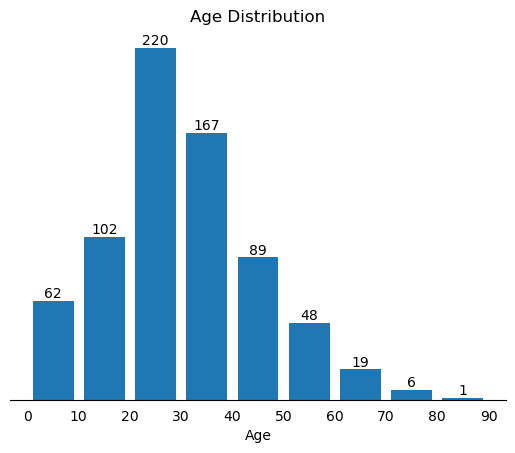

In [11]:
# Define data and bins
ages = train['Age']
bins = range(0, 99, 10)  # Define bins with width of 10

# Create histogram
counts, bins, _ = plt.hist(ages, bins=bins, align='mid', rwidth=0.8)

# Customize ticks and labels
plt.xticks(bins)
plt.xlabel('Age')
plt.title('Age Distribution')

# Remove unnecessary spines
plt.gca().spines[['top','right','left']].set_visible(False)
plt.tick_params(axis='y', which='both', left=False,labelleft=False)

# Remove ticks from x-axis
plt.tick_params(axis='x', bottom=False)

# Annotate bars with their frequency values
for i, count in enumerate(counts):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count, str(int(count)), ha='center', va='bottom')

# Show the plot
plt.show()